In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from uncertainties.umath import *

# Wechselstromwiderstände

## Induktivität und Kapazität

### Grundlegende Formeln

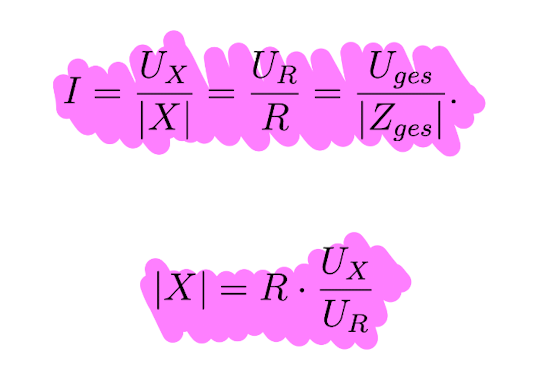

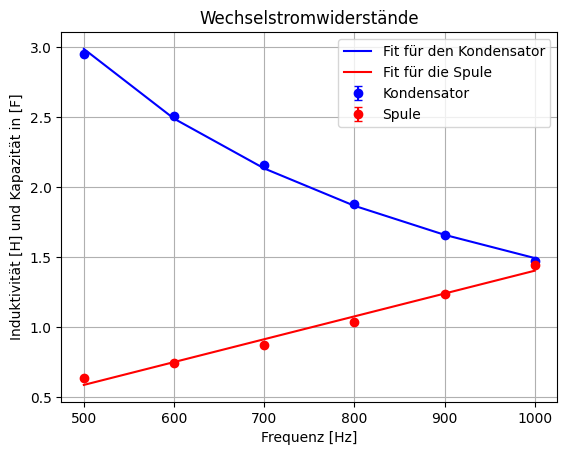

L = 0.000519 H
C = 0.000107 F


In [27]:
f = np.array([500, 600, 700, 800, 900, 1000])
f_err = np.array([1, 1, 1, 1, 1, 1])
Uc = np.array([0.874, 0.836, 0.793, 0.749, 0.706, 0.667]) #Effektivwerte
Uc_err = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
Ur1 = np.array([0.296, 0.333, 0.367, 0.398, 0.426, 0.452]) #Effektivwerte
Ur1_err = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

Ul = np.array([0.461, 0.503, 0.551, 0.603, 0.666, 0.727]) #Effektivwerte
Ul_err = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
Ur2 = np.array([0.727, 0.679, 0.629, 0.580, 0.538, 0.503,]) #Effektivwerte
Ur2_err = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

R = 1

Xc = R * (Uc/Ur1)

Xc_vals = unp.nominal_values(Xc)
Xc_errs = unp.std_devs(Xc)


def Xc_model(f, Xc_vals): 
    return 1 / (2*np.pi * f * Xc_vals)

popt, pcov = curve_fit(Xc_model, f, Xc_vals)
C_fit = popt[0]
C_err = np.sqrt(pcov[0,0])


Xl = R * (Ul/Ur2)

Xl_vals = unp.nominal_values(Xl)
Xl_errs = unp.std_devs(Xl)

slope_l, intercept_l, r, _, std = linregress(f, Xl_vals)


plt.figure()
plt.errorbar(f, Xc_vals, yerr=Xc_errs, color="blue", fmt='o', capsize=3, label="Kondensator") 
plt.errorbar(f, Xl_vals, yerr=Xl_errs, color="red", fmt='o', capsize=3, label="Spule") 
plt.plot(f, Xc_model(f, C_fit), color="blue", markersize=2, label=rf"Fit für den Kondensator") # regressionsfunktion
plt.plot(f, f*slope_l+intercept_l, color="red", markersize=2, label=rf"Fit für die Spule") # regressionsfunktion
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Induktivität [H] und Kapazität in [F]")
plt.title("Wechselstromwiderstände")
plt.legend()
plt.grid(True)
plt.show()


L = slope_l / np.pi
print(f"L = {L:3f} H") 

print(f"C = {popt[0]:3f} F")




## Schwingkreis

### Grundlegende Formeln

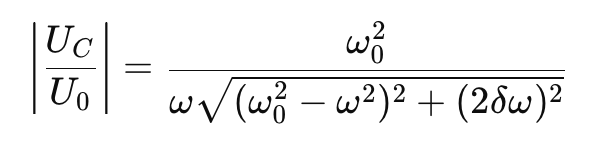

Fit-Ergebnisse:
ω0   = 8.08422e+03 ± 3.18963e+01  [rad/s]
δ    = 1.64456e+03 ± 3.32401e+01  [1/s]


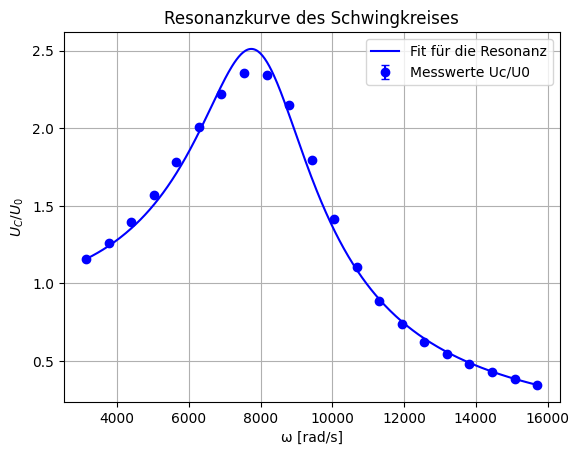

In [38]:
Unsicherheit_f = 1
f = unp.uarray([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500], Unsicherheit_f)
omega = 2*np.pi*f
Unsicherheit_Spannung = 0.1
Uc = unp.uarray([1156, 1217, 1284, 1343, 1384, 1397, 1382, 1336, 1258, 1149, 1017, 877, 753, 650, 568, 502, 448, 403, 366, 333, 304], Unsicherheit_Spannung) #Effektivwerte
U0 = unp.uarray([996, 965, 918, 854, 776, 696, 623, 568, 537, 535, 566, 620, 681, 732, 772, 802, 824, 842, 856, 867, 875], Unsicherheit_Spannung) #Effektivwerte

Uc0 = Uc / U0

y = unp.nominal_values(Uc0)
y_err = unp.std_devs(Uc0)

omega_vals = unp.nominal_values(omega)


def resonance_model (omega, omega0, delta): 
    return (omega0**2) / (np.sqrt((omega0**2 - omega**2)**2 + (2*delta*omega)**2))
p0 = [100, 10]

popt, pcov = curve_fit(resonance_model, omega_vals, y, sigma = y_err, p0 = p0)
omega0_fit, delta_fit = popt
omega0_err, delta_err = np.sqrt(np.diag(pcov))

print("Fit-Ergebnisse:")
print(f"ω0   = {omega0_fit:.5e} ± {omega0_err:.5e}  [rad/s]")
print(f"δ    = {delta_fit:.5e} ± {delta_err:.5e}  [1/s]")

omega_plot = np.linspace(omega_vals.min(), omega_vals.max(), 400)

plt.figure()
plt.errorbar(omega_vals, y, yerr=y_err, color="blue", fmt='o', capsize=3, label="Messwerte Uc/U0") 
plt.plot(omega_plot, resonance_model(omega_plot, omega0_fit, delta_fit), color="blue", markersize=2, label=rf"Fit für die Resonanz") # regressionsfunktion
plt.xlabel("ω [rad/s]")
plt.ylabel("$U_C / U_0$")
plt.title("Resonanzkurve des Schwingkreises")
plt.legend()
plt.grid(True)
plt.show()


